
# Diseño de software para cómputo científico

----

## Unidad 2: Mock


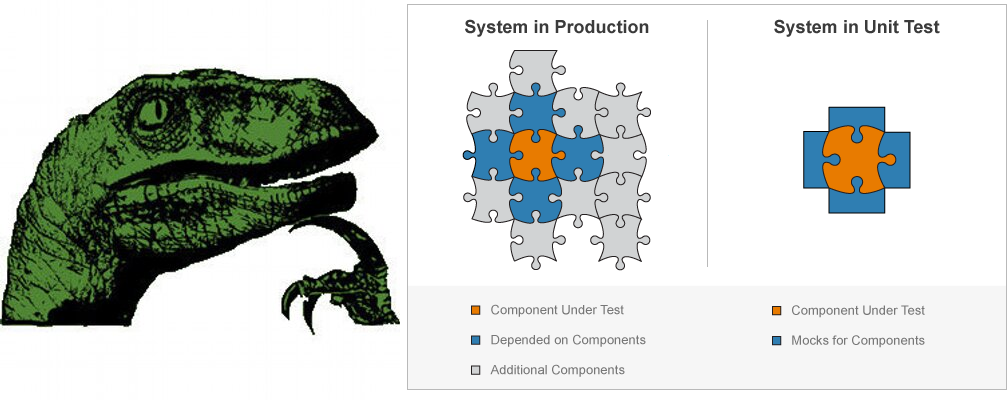


----
<small>
    <b>Fuente: </b><a href="https://es.slideshare.net/surajssd009005/python-testing-using-mock-and-pytest">https://es.slideshare.net/surajssd009005/python-testing-using-mock-and-pytest</a></small>

## Mock - `unittest.mock`

> *Defn:* `unittest.mock` es una biblioteca para testing en Python. 
Permite reemplazar partes de un sistema bajo prueba con
objetos sinteticos y hacer afirmaciones sobre cómo han
ha sido usado.

- Usando Mock se puede reemplazar/simular cualquier dependencia del código.
- Remplazar partes de ejecución costosa o poco confiables.
- Sirve para evaluar la correcta de ejecucón de las funciones desarrolladas en lugar de llegar hasta el resultado final.
- Mock tambien acelera código lento reemplazandolo por llamadas.

## Mock básico

In [1]:
from unittest.mock import Mock

m = Mock()
m

<Mock id='140124188196480'>

In [2]:
m.some_value = 23
m.some_value

23

In [8]:
m.other_value  # una vez accedido devuelve el mismo (Ver id)

<Mock name='mock.other_value' id='140124187294736'>

## Mock básico

In [9]:
m.get_value(value=42)

<Mock name='mock.get_value()' id='140124187295408'>

In [10]:
m.get_value.assert_called_once_with(value=42)

In [11]:
m.get_value.assert_called_once_with(value=2)

AssertionError: expected call not found.
Expected: get_value(value=2)
Actual: get_value(value=42)

## Más sobre los objetos Mock

- Pueden reemplazar cualquier parte de código.
- Crea atriburos a medida que se accede a ellos.
- Recuerda como fueron accedidos esos atributos.
- Genera `asserts` basado en esa historia de acceso.

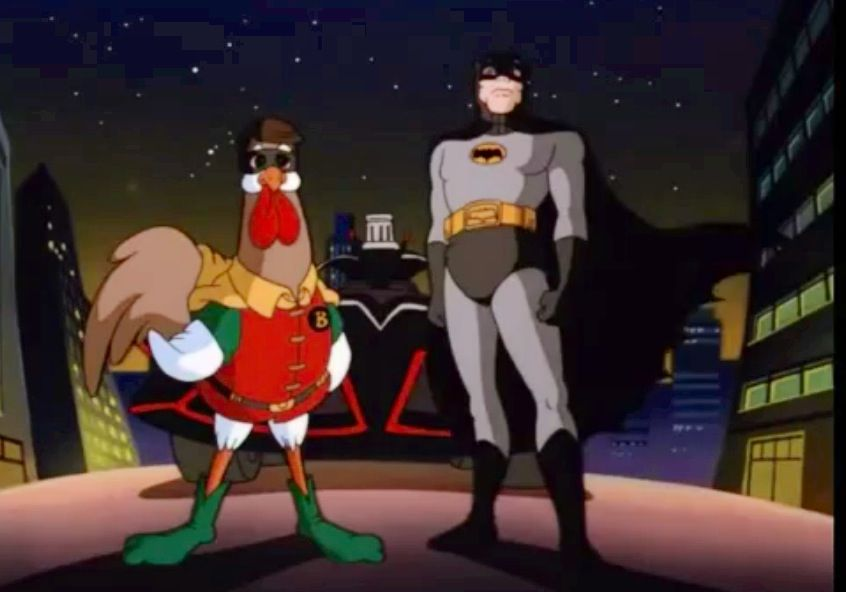

## Personalización de Mocks

- Sirve para restringir el comportamiento de los mocks
- Se puede definir atributos o métodos (con puntos en el nombre)

In [12]:
config = {
    'company': 'Lenovo',
    'model': 'Ideapad Z510',
    'get_sticker_count.return_value': 11,
    'get_fan_speed.side_effect': ValueError
}

m = Mock(**config)
m.company

'Lenovo'

In [13]:
m.get_sticker_count()

11

In [14]:
m.get_fan_speed()

ValueError: 

## Usando spec para definir atributos

- Es un poco menos granular pero define exactamente que atributos estan disponibles.
- Cada atributo creado a su vez es un mock.

In [15]:
user_info = ['first_name', 'last_name', 'email']

m = Mock(spec=user_info)
m.first_name

<Mock name='mock.first_name' id='140124186903792'>

In [17]:
m.last_name

<Mock name='mock.last_name' id='140124186904704'>

## Creación automática de specs

- Copia el contenido de otro objeto.
- Reemplaca los valores por mock

In [18]:
from unittest.mock import create_autospec

import os
m = create_autospec(os)
m

<NonCallableMagicMock spec='module' id='140124186904368'>

In [19]:
dir(m)

['CLD_CONTINUED',
 'CLD_DUMPED',
 'CLD_EXITED',
 'CLD_KILLED',
 'CLD_STOPPED',
 'CLD_TRAPPED',
 'DirEntry',
 'EX_CANTCREAT',
 'EX_CONFIG',
 'EX_DATAERR',
 'EX_IOERR',
 'EX_NOHOST',
 'EX_NOINPUT',
 'EX_NOPERM',
 'EX_NOUSER',
 'EX_OK',
 'EX_OSERR',
 'EX_OSFILE',
 'EX_PROTOCOL',
 'EX_SOFTWARE',
 'EX_TEMPFAIL',
 'EX_UNAVAILABLE',
 'EX_USAGE',
 'F_LOCK',
 'F_OK',
 'F_TEST',
 'F_TLOCK',
 'F_ULOCK',
 'GRND_NONBLOCK',
 'GRND_RANDOM',
 'GenericAlias',
 'MFD_ALLOW_SEALING',
 'MFD_CLOEXEC',
 'MFD_HUGETLB',
 'MFD_HUGE_16GB',
 'MFD_HUGE_16MB',
 'MFD_HUGE_1GB',
 'MFD_HUGE_1MB',
 'MFD_HUGE_256MB',
 'MFD_HUGE_2GB',
 'MFD_HUGE_2MB',
 'MFD_HUGE_32MB',
 'MFD_HUGE_512KB',
 'MFD_HUGE_512MB',
 'MFD_HUGE_64KB',
 'MFD_HUGE_8MB',
 'MFD_HUGE_MASK',
 'MFD_HUGE_SHIFT',
 'Mapping',
 'MutableMapping',
 'NGROUPS_MAX',
 'O_ACCMODE',
 'O_APPEND',
 'O_ASYNC',
 'O_CLOEXEC',
 'O_CREAT',
 'O_DIRECT',
 'O_DIRECTORY',
 'O_DSYNC',
 'O_EXCL',
 'O_LARGEFILE',
 'O_NDELAY',
 'O_NOATIME',
 'O_NOCTTY',
 'O_NOFOLLOW',
 'O_NONBLOCK'

## Servidor de números aleatorios

- Voy a utilizar un framework web que se llama **bottle**.
- Un framework es una librería que no te brinda control de su ejecución pero te perminte interferir su funcionamiento para injectar valores.
- Emulemos algo del tipo: https://www.random.org/

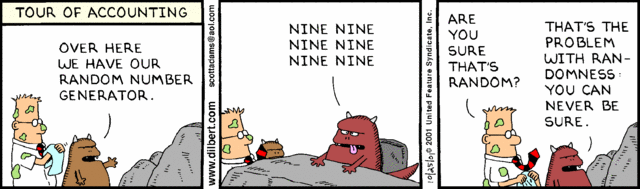

## Servidor de números aleatorios

- Yoy a correr un mini servidor de numeros aleatorios en mi propia compu (`code/server.py`)
- Se corre con `python 03_mock_code/server.py`

```python
import time
import numpy as np
import bottle  # pip install bottle

app = bottle.Bottle()

@app.route("/random")
def random():
    time.sleep(np.random.randint(0, 1) + np.random.rand())
    return str(np.random.rand())

if __name__ == "__main__":
    app.run(host='localhost', port=5000, debug=True)
```

## Pidamos los números aleatorios.

> Juan: Acordate de poner la terminal del server 

In [25]:
%%time

import requests # pip install requests
response = requests.get("http://localhost:5000/random")

print(response, "-", f"Random={response.text}")
print("-" * 80)

<Response [200]> - Random=0.5329163223644594
--------------------------------------------------------------------------------
CPU times: user 7.58 ms, sys: 478 µs, total: 8.06 ms
Wall time: 803 ms


## Creemos un dado de 100 caras

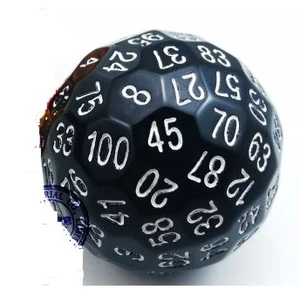

In [28]:
def roll(success):
    response = requests.get("http://localhost:5000/random")
    value = float(response.text)
    print(F"[Debug] {value}")
    return success <= value

roll(.8)

[Debug] 0.7968139832419731


False

## Probando el d100

- Lo que se quiere probar es que devuelva `True` si el valor retornado por el servidor es menor que `success`, y `False` en el caso contrario.
- No tenemos control sobre el servidor.
- Solo desarrollamos `roll`. 

In [ ]:
# code/test_dice.py

def test_win():
    assert roll(1.)
    assert roll(.8)
    assert roll(.1)
    
def tesst_lose():
    assert not roll(1.) 
    assert not roll(.8)
    assert not roll(.1)


## Usando mock con patch

- `patch()` Replasa un objeto con mock según su nombre completo (*nombre.completo.del.objeto*)
- Puede usarse como un decorator/context manager.


In [54]:
# code/test_roll.py

def test_win():
    response = mock.Mock(text="1")
    with mock.patch("requests.get", return_value=response) as mget:
        assert roll(1.)
        assert roll(.8)
        assert roll(.1)
    mget.assert_called() 


def test_lose():
    response = mock.Mock(text="0")
    with mock.patch("requests.get", return_value=response) as mget:
        assert not roll(1.)
        assert not roll(.8)
        assert not roll(.1)
    mget.assert_called()

## Usando mock con patch

- Como decorador sirve para envolver cosas mas grandes o por ejemplo.

In [ ]:
# code/test_roll_dec.py

@mock.patch("requests.get", return_value=mock.Mock(text="1"))
def test_win(mget):
    assert roll(1.)
    assert roll(.8)
    assert roll(.1)
    mget.assert_called()


@mock.patch("requests.get", return_value=mock.Mock(text="0"))
def test_lose(mget):
    assert not roll(1.)
    assert not roll(.8)
    assert not roll(.1)
    mget.assert_called()

## Cerrando

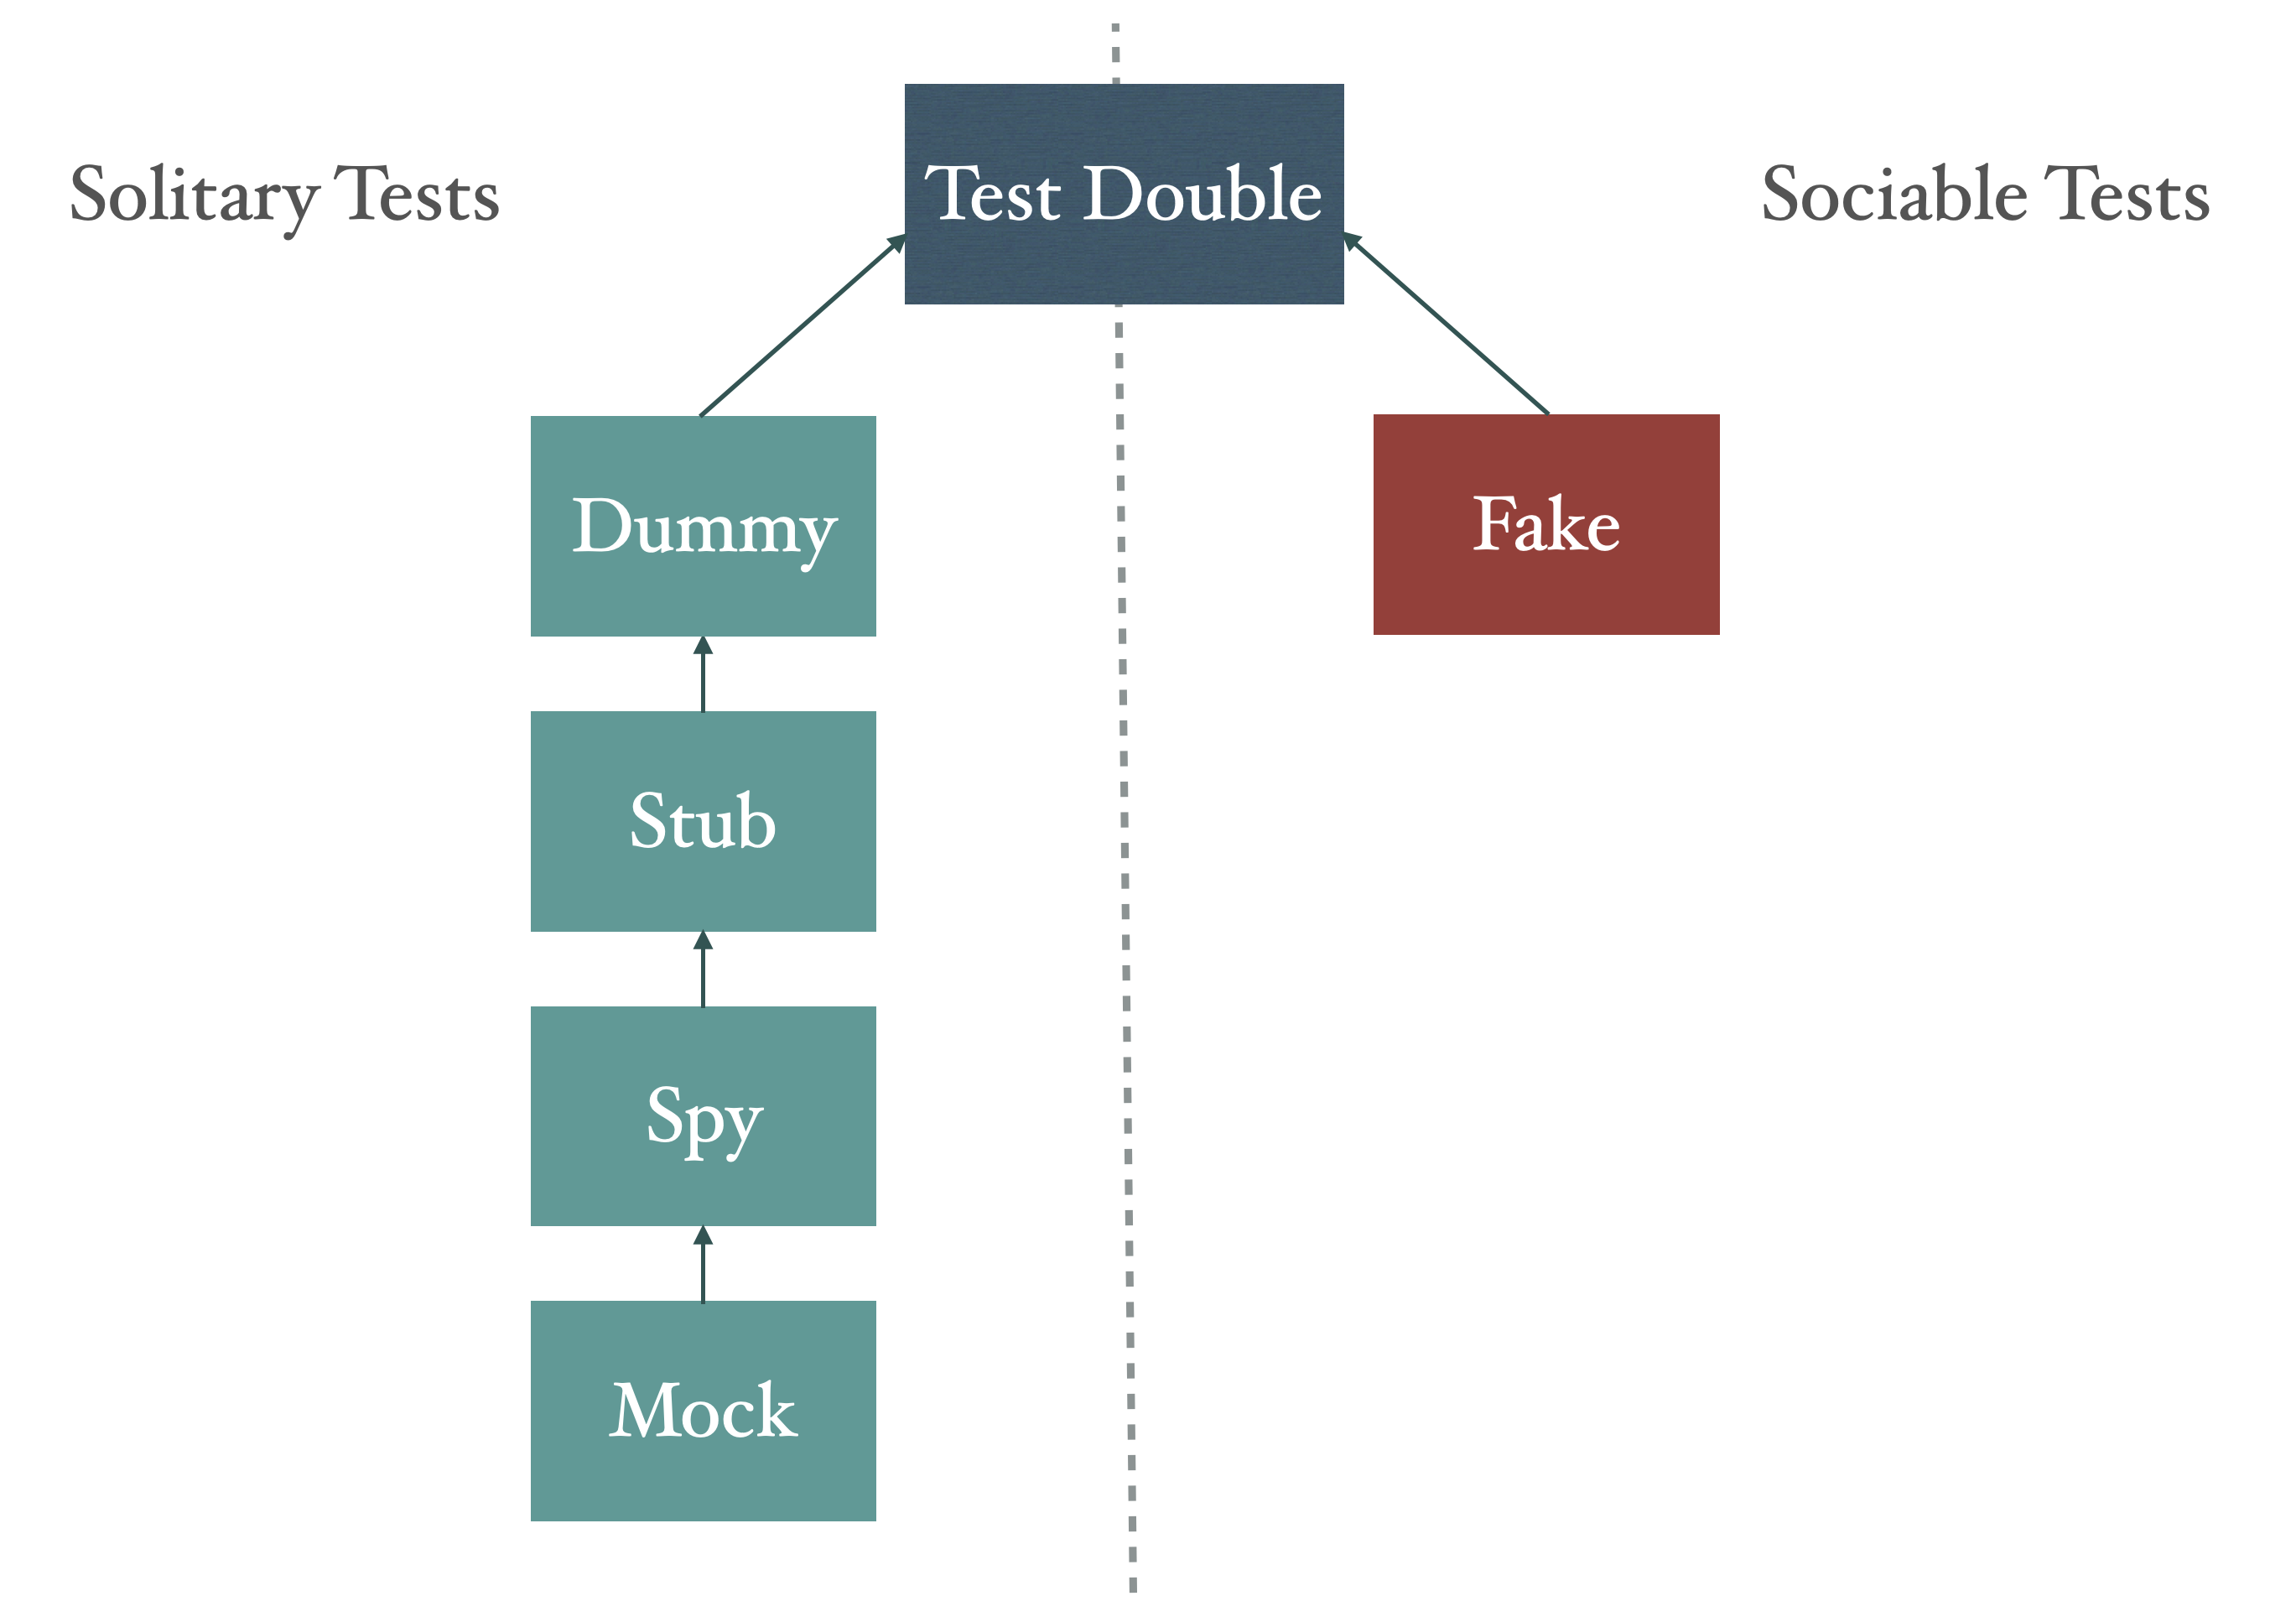

More info https://principal-it.eu/2020/04/test-doubles/